In [34]:
import os
import nest_asyncio
from llama_parse import LlamaParse
from llama_index.core.schema import ImageDocument
from llama_index.multi_modal_llms.openai import OpenAIMultiModal
from typing import List

nest_asyncio.apply()

FILE_NAME = "./data/example/Brusselator.pdf"
IMAGES_DOWNLOAD_PATH = "./data/example/images/"

LLAMA_CLOUD_API_KEY = os.environ["LLAMA_CLOUD_API_KEY"]
OPENAI_API_KEY = os.environ["OPENAI_API_KEY"]

In [35]:
parsing_instruction = """You are parsing a research paper. 
    Please extract all text, images and equations. Ensure that all equations are parsed correctly.
    Output any math equation in LaTeX markdown (between $$)."""

parser = LlamaParse(
    api_key=LLAMA_CLOUD_API_KEY,
    parsing_instruction=parsing_instruction,
    result_type="markdown",
    premium_mode=True,
)


In [36]:
# Extract objects from the file
json_objs = parser.get_json_result(FILE_NAME)

Started parsing the file under job_id fb4c2ce3-d2f3-4f0e-8835-9c68b9ef78df


In [39]:
def get_text(json_objs: List[dict]) -> str:
    return "\n\n".join([obj["md"] for obj in json_objs[0]["pages"]])

text = get_text(json_objs)

def get_image_nodes(json_objs: List[dict], download_path: str) -> List[ImageDocument]:
    image_dicts = parser.get_images(json_objs, download_path=download_path)
    return [ImageDocument(image_path=image_dict["path"]) for image_dict in image_dicts]

image_documents = get_image_nodes(json_objs, IMAGES_DOWNLOAD_PATH)

> Image for page 1: [{'name': 'img_p0_1.png', 'height': 389, 'width': 499, 'x': 287.24998803125, 'y': 126.74999471874997, 'original_width': 350, 'original_height': 273}, {'name': 'img_p0_2.png', 'height': 178, 'width': 178, 'x': 455.999981, 'y': 434.99998187500006, 'original_width': 125, 'original_height': 125}, {'name': 'img_p0_3.png', 'height': 72, 'width': 72, 'x': 58.4999975625, 'y': 43.4999981875, 'original_width': 100, 'original_height': 100}, {'name': 'page_1.jpg', 'height': 842.88, 'width': 595.91998, 'x': 0, 'y': 0, 'type': 'full_page_screenshot'}]
> Image for page 2: [{'name': 'img_p1_1.png', 'height': 235, 'width': 314, 'x': 384.74998396875, 'y': 44.999998125000005, 'original_width': 220, 'original_height': 165}, {'name': 'img_p1_2.png', 'height': 1, 'width': 1, 'x': 43.4999981875, 'y': 503.999979}, {'name': 'page_2.jpg', 'height': 842.88, 'width': 595.91998, 'x': 0, 'y': 0, 'type': 'full_page_screenshot'}]


In [40]:
print(text)

Here is the extracted content from the Wikipedia page on Brusselator:

# Brusselator

The Brusselator is a theoretical model for a type of autocatalytic reaction. The Brusselator model was proposed by Ilya Prigogine and his collaborators at the Université Libre de Bruxelles.[2][3]

It is a portmanteau of Brussels and oscillator.

It is characterized by the reactions

$$A \rightarrow X$$

$$2X + Y \rightarrow 3X$$

$$B + X \rightarrow Y + D$$

$$X \rightarrow E$$

Under conditions where A and B are in vast excess and can thus be modeled at constant concentration, the rate equations become

$$\frac{d}{dt}\{X\} = \{A\} + \{X\}^2\{Y\} - \{B\}\{X\} - \{X\}$$

$$\frac{d}{dt}\{Y\} = \{B\}\{X\} - \{X\}^2\{Y\}$$

where, for convenience, the rate constants have been set to 1.

The Brusselator has a fixed point at

$$\{X\} = A$$

$$\{Y\} = \frac{B}{A}$$

The fixed point becomes unstable when

$$B > 1 + A^2$$

leading to an oscillation of the system. Unlike the Lotka–Volterra equation, the oscilla

In [41]:
openai_mm_llm = OpenAIMultiModal(
    model="gpt-4o", api_key=OPENAI_API_KEY, max_new_tokens=300
)

response = openai_mm_llm.complete(
    prompt=f"""You are an expert in all sciences. 
    You are given a research article text and figures (images).

    Your task is to extract the governing dynamical equations from the article.
    The article is: '{text}'
      """,
    image_documents=image_documents,
)

print(response)


The governing dynamical equations for the Brusselator model, as extracted from the text, are:

1. For species \( X \):
   \[
   \frac{d}{dt}\{X\} = \{A\} + \{X\}^2\{Y\} - \{B\}\{X\} - \{X\}
   \]

2. For species \( Y \):
   \[
   \frac{d}{dt}\{Y\} = \{B\}\{X\} - \{X\}^2\{Y\}
   \]

These equations describe the rate of change of concentrations of species \( X \) and \( Y \) in the Brusselator model, assuming that the concentrations of \( A \) and \( B \) are constant. The rate constants are set to 1 for simplicity. The system exhibits oscillatory behavior under certain conditions, specifically when \( B > 1 + A^2 \).


In [65]:
print(str(response))

The governing dynamical equations for the Brusselator model, as extracted from the text, are:

1. For species \( X \):
   \[
   \frac{d}{dt}\{X\} = \{A\} + \{X\}^2\{Y\} - \{B\}\{X\} - \{X\}
   \]

2. For species \( Y \):
   \[
   \frac{d}{dt}\{Y\} = \{B\}\{X\} - \{X\}^2\{Y\}
   \]

These equations describe the rate of change of concentrations of species \( X \) and \( Y \) in the Brusselator model, assuming that the concentrations of \( A \) and \( B \) are constant. The rate constants are set to 1 for simplicity. The system exhibits oscillatory behavior under certain conditions, specifically when \( B > 1 + A^2 \).


In [59]:
openai_mm_llm = OpenAIMultiModal(
    model="gpt-4o", api_key=OPENAI_API_KEY, max_new_tokens=1000
)

code_response = openai_mm_llm.complete(
    prompt=f"""You are an expert in python programming. 
    You are given a research article text and figures (images) and a set of extracted equations.

    Your task is to write python code to simulate the extracted equations.
    Use the images to extract parameters for the equations.
    Plot the results of the simulation and save the figure to a file called 'simulation_plot.png'.

    The article is: '{text}'
    The extracted equations are: '{str(response)}'""",
    image_documents=image_documents,
)

In [60]:
code = str(code_response).split("```python")[1].split("```")[0]
print(code)



import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Define the Brusselator model equations
def brusselator(t, y, A, B):
    X, Y = y
    dXdt = A + X**2 * Y - (B + 1) * X
    dYdt = B * X - X**2 * Y
    return [dXdt, dYdt]

# Parameters for the simulation
A_stable = 1
B_stable = 1.7
A_unstable = 1
B_unstable = 3

# Initial conditions
X0 = 1.5
Y0 = 3.0
initial_conditions = [X0, Y0]

# Time span for the simulation
t_span = (0, 20)
t_eval = np.linspace(*t_span, 1000)

# Solve the ODEs for stable regime
sol_stable = solve_ivp(brusselator, t_span, initial_conditions, args=(A_stable, B_stable), t_eval=t_eval)

# Solve the ODEs for unstable regime
sol_unstable = solve_ivp(brusselator, t_span, initial_conditions, args=(A_unstable, B_unstable), t_eval=t_eval)

# Plot the results
plt.figure(figsize=(12, 6))

# Stable regime plot
plt.subplot(1, 2, 1)
plt.plot(sol_stable.t, sol_stable.y[0], label='Species X', color='blue')
plt.plot(sol_stable.t, sol_stable.

In [54]:
!pip install matplotlib scipy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.1/23.1 MB 31.6 MB/s eta 0:00:00a 0:00:01


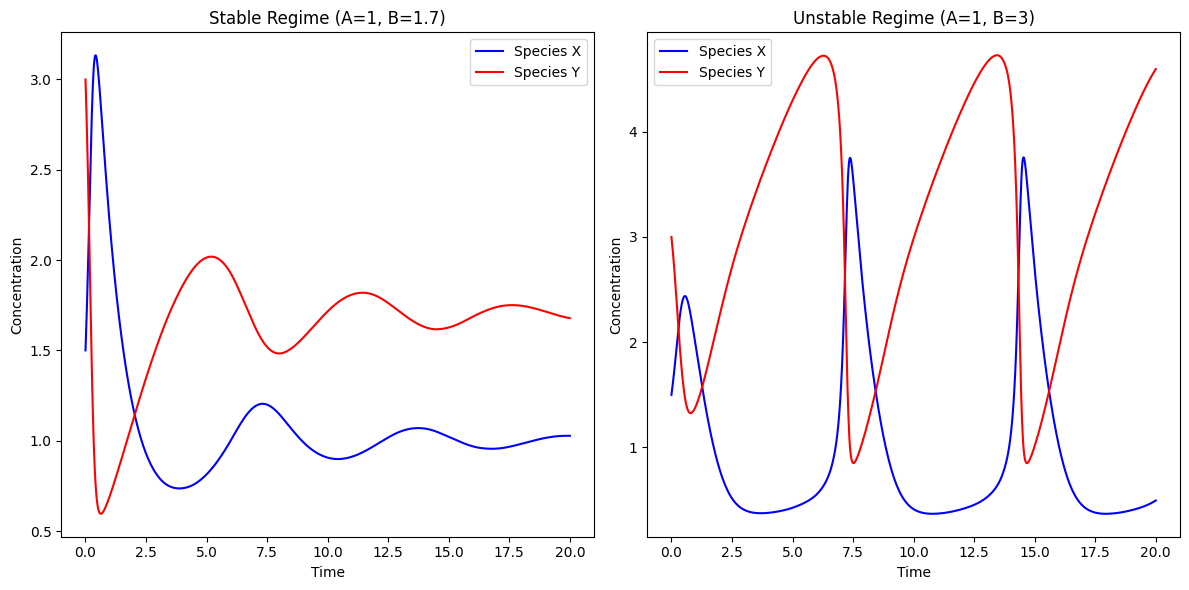

In [61]:
exec(code)

In [58]:
print(code[-100:])

initial_conditions, args=(A_stable, B_stable), t_eval=t_eval)

# Solve the ODEs for unstable regime



In [62]:
image_documents_with_results = image_documents + [ImageDocument(image_path="simulation_plot.png")]

In [63]:
openai_mm_llm = OpenAIMultiModal(
    model="gpt-4o", api_key=OPENAI_API_KEY, max_new_tokens=1000
)

code_response = openai_mm_llm.complete(
    prompt=f"""You are an expert in all sciences. 
    You are given a research article text and figures (images) and simulation results produced by user code (the last image).

    Your task is to critically verify that the simulation results match the results in the article.

    If the simulation results are in agreement with the article, write 'Correct.' plus a short explanation.
    If the simulation results are not in agreement with the article, write 'Incorrect.' plus a short explanation.

    The article is: '{text}'""",
    image_documents=image_documents_with_results,
)

In [64]:
print(code_response)

Correct. 

The simulation results match the descriptions in the article. The left graph shows a stable regime with \(A=1\) and \(B=1.7\), where the system approaches a fixed point, consistent with \(B < 1 + A^2\). The right graph shows an unstable regime with \(A=1\) and \(B=3\), where the system exhibits oscillations and approaches a limit cycle, consistent with \(B > 1 + A^2\).
